
# Visualizing the spherical harmonics. <br>

## Introduction

In this iPython demo, we will explore a different way of visualizing the spherical harmonics, which you saw in class in the context of molecular rotations.  We will plot the spherical harmonics as a colormap on the surface of a 3D sphere, where the colors represent the value of the spherical harmonic. This should give you an intuition of what the spherical harmonics "look" like (and why they're called like that). <br><br>

The spherical harmonics are defined as the angular portion of the solution of Laplace equation in 3 dimensions:

$$\vec \nabla^2 \psi=0 \quad \text{(Laplace Equation)}$$

They appear everywhere is physics because they are eigenfunctions of the square of the orbital angular momentum operator, $\hat{L}=-i\hbar \vec{r} \nabla$. We will see the spherical harmonics again when looking at the solutions of the hydrogen atom and in the computation of atomic orbital electron configurations later in the course. The functional form of the spherical harmonics is:

$$Y^{m}_{l}(\theta,\phi)=N e^{im\phi}P^{m}_{l}(\cos(\theta))$$

where $N$ is a normalization constant and $P^{m}_{l}(\cos(\theta))$ is the associated legendre polynomial. These functions fullfill:

$$\hat{L}^2 Y^{m}_{l}(\theta,\phi) = -l(l+1) \hbar^2Y^{m}_{l}(\theta,\phi)$$

Notice that the spherical harmonics are defined in spherical coordinates and depend only on $\theta$ and $\phi$, meaning they are independent of $r$. That's why we can visualize them on the surface of a sphere.<br><br>

<img src="files/3D_Spherical.svg" alt="Drawing" style="width: 400px;"/>

As you noticed, the spherical harmonics are complex functions. However we can build a real basis of spherical harmonics as follows:

$$ \begin{align}
Y_{\ell m} &=
\begin{cases}
\displaystyle \sqrt{2} \, (-1)^m \, \operatorname{Im}[{Y_\ell^{m}}] & \text{if}\ m<0\\
\displaystyle  Y_\ell^0 & \text{if}\ m=0\\
\displaystyle \sqrt{2} \, (-1)^m \, \operatorname{Re}[{Y_\ell^m}] & \text{if}\ m>0.
\end{cases}
\end{align}$$

Notice the change in the notation for the real harmonics (both m and l appear as subscripts). These are the functions we will be plotting today.<br><br>

### First, lets import the modules we'll be needing. 

In [1]:
%matplotlib inline
import numpy as np
from scipy.special import sph_harm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib
from matplotlib import cm
import imp
import os
qworld = imp.load_source('qworld', '../library/quantumWorld.py')

##### **Caution!**<br>Some of the cells below might take too long to run depending on your system specs.  If you find that a particular cell is running too slowly, modify the parameter values to increase the speed (e.g. decrease number of time steps, or the number of values on your grids.)

## <i class="fa fa-wrench"></i> Step 1: Plotting the spherical Harmonics

In the following cell, we have written for you a bunch of functions we will need in order to plot the spherical harmonics on the surface of a 3D sphere. You only need to add three lines of code to the first function, where you transform spherical to cartesian coordinates. Remember how to do that? <br><br>  $$x = r\sin(\phi)\cos(\theta)$$ $$y = r\sin(\phi)\sin(\theta)$$ $$z = r\cos(\phi)$$

And another 3 lines to the second function, where we define the real spherical harmonics:

$$ \begin{align}
Y_{\ell m} &=
\begin{cases}
\displaystyle \sqrt{2} \, (-1)^m \, \operatorname{Im}[{Y_\ell^{m}}] & \text{if}\ m<0\\
\displaystyle  Y_\ell^0 & \text{if}\ m=0\\
\displaystyle \sqrt{2} \, (-1)^m \, \operatorname{Re}[{Y_\ell^m}] & \text{if}\ m>0.
\end{cases}
\end{align}$$

In [70]:
def spherical_to_cartesian(theta, phi, r=1):
    '''This function converts spherical coordinates to cartesian coordinates. 
    '''
    #################
    #WRITE THREE LINES OF CODE THAT TRANSFORM SPHERICAL TO CARTESIAN COORDINATES
    #the output should be x,y,z
    x = r*np.sin(phi)*np.cos(theta)
    y = r*np.sin(phi)*np.sin(theta)
    z = r*np.cos(phi)
    #################
    
    return x,y,z

def get_real_sh(Y_lm,m):
    #################
    #COMPLETE THE MISSING THREE LINES OF CODE TO CALCULATE THE REAL 
    # SPHERICAL HARMONICS
    if m<0:
        Y_lm_real = np.sqrt(2.0)*(-1.0)**m*Y_lm.imag
    elif m>0:
        Y_lm_real = np.sqrt(2.0)*(-1.0)**m*Y_lm.real
    else:
        Y_lm_real = Y_lm
    #################
    return Y_lm_real
    
def plot_spherical_harmonics(l, m, theta, phi, ax):
    '''this function does some matplotlib trickery to plot the 
    real Y_lm spherical harmonics
    on the surface of a 3D sphere as a colormap. 
    '''
    theta_mg, phi_mg = np.meshgrid(theta, phi)
    # computing the spherical harmonics
    Y_lm = sph_harm(m, l, theta_mg, phi_mg) 
    Y_lm_real = get_real_sh(Y_lm,m)

    color_map = matplotlib.cm.get_cmap(name='seismic', lut=None)
    cm = matplotlib.cm.ScalarMappable(norm=None, cmap=color_map)
    mapped_Y_lm = cm.to_rgba(Y_lm_real)
    
    x,y,z = spherical_to_cartesian(theta_mg, phi_mg, r=1)
    #x,y,z = spherical_to_cartesian(theta_mg, phi_mg - np.pi/2.0, r=1)
    
    dt = np.dtype(object) 
    colors = np.zeros(Y_lm_real.shape, dtype = dt)

    for ph in range(len(phi)):
        for th in range(len(theta)):
            colors[ph,th] = mapped_Y_lm[ph,th]
    
    surf = ax.plot_surface(x,y,z, facecolors = colors)
    ax.view_init(20, 45)
    ax.set_title('l='+str(l)+' m='+str(m))
    ax.set_xlabel('x',fontsize=16)
    ax.set_ylabel('y',fontsize=16)
    ax.set_zlabel('z',fontsize=16)
    
def plot_spherical_harmonics_many_m(l, fig, theta, phi):
    '''
    This function plots on several subplots inside a singel figure the spherical harmonics
    Y_l,0 Y_l,1, Y_l,2.. Y_l,l. (that is, many m for a single value of l)
    '''
    num_rows = 1
    num_cols = 2*l+1
    for m in range(-l,l+1,1):
        ax = fig.add_subplot(num_rows,num_cols,m+l+1,projection='3d')
        plot_spherical_harmonics(l, m, theta, phi, ax)
        
def plot_on_sphere(f_xyz, theta_mg, phi_mg, ax):
    '''This python function plots any f_xyz function as a colormap on the surface of a sphere. 
    '''
    
    color_map = matplotlib.cm.get_cmap(name='seismic', lut=None)
    cm = matplotlib.cm.ScalarMappable(norm=None, cmap=color_map)
    mapped_f_xyz = cm.to_rgba(f_xyz)
    
    x,y,z = spherical_to_cartesian(theta_mg, phi_mg, r=1)
    #x,y,z = spherical_to_cartesian(theta_mg, phi_mg - np.pi/2.0, r=1)
    
    dt = np.dtype(object) 
    colors = np.zeros(f_xyz.shape, dtype = dt)

    for ph in range(len(phi)):
        for th in range(len(theta)):
            colors[ph,th] = mapped_f_xyz[ph,th]
    
    cosa=ax.plot_surface(x,y,z, facecolors = colors)
    ax.view_init(20, 45)
    return cosa

Now create an array of theta $\theta$ values that goes from 0 to $2\pi$ and an array of phi $\phi$ that goes from 0 to $\pi$. 

**NOTE: Choose the step size such that your figures have good resolution, but don't take hours to generate.  In my machine, we used intervals of 0.01.**

In [22]:
# CREATE AN ARRAY theta THE GOES FROM 0 TO 2PI AND AN ARRAY PHI THAT GOES FROM O TO PI
# USE INTERVALS OF 0.05
theta = np.arange(0, 2*np.pi, 0.01)
phi = np.arange(0, np.pi, 0.01)

Now run the pieces of code below to plot the $l=1\;$  $l=2\;$ and $l=3\;$ spherical harmonics for different values of $m$.

#### For l=0

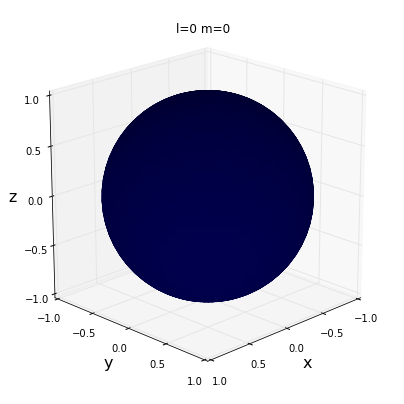

In [23]:
fig = plt.figure()
fig.set_size_inches(7, 7)
l=0
# USE THE FUNCTION plot_spherical_harmonics_many_m(l, fig)
plot_spherical_harmonics_many_m(l, fig, theta, phi)


#### Now repeat for l=1

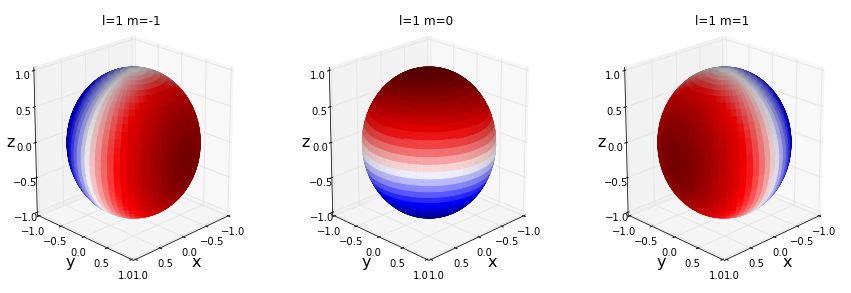

In [24]:
fig = plt.figure()
fig.set_size_inches(15, 5)
l=1
# USE THE FUNCTION plot_spherical_harmonics_many_m(l, fig)
plot_spherical_harmonics_many_m(l, fig, theta, phi)

#### Now repeat for l=2

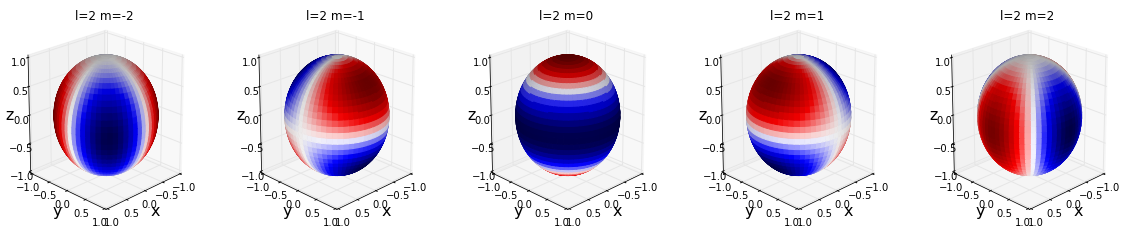

In [25]:
fig = plt.figure()
fig.set_size_inches(20, 4)
l=2
# USE THE FUNCTION plot_spherical_harmonics_many_m(l, fig)
plot_spherical_harmonics_many_m(l, fig, theta, phi)

### <i class="fa fa-gear"></i> Don't you think you've seen these functions before? Aren't they beautiful? 

We will see in a few weeks that the solutions for the Schrodinger equation of the hydrogen atom can be expressed as:

$$\psi(r,\theta,\phi)=NR(r)Y^{m}_{l}(\theta,\phi)$$

where R is a radial function, and Y a spherical harmonic. The spherical harmonics determine the spatial form of the atomic orbitals. You are already familiar with these forms:

<img src="files/aorbitals.jpg" alt="Drawing" style="width: 600px;"/>

Now go ahead an compare the plots for the orbitals with our representation of the harmonics. Can you match them?

## <i class="fa fa-wrench"></i> Step 2. Propagating a linear combination of rotational eigenstates. 

Like other eigenfunctions we've worked with (particle in a box eigenfunctions, Harmonic Oscillator eigenfunctions in 1D and 2D, etc), we can take linear combinations of the spherical harmonics, and propagate the resulting wavefunction through time.  To do this, we do what we always do: We get the energy associated to each eigenfunction/spherical harmonic, and we propagate the coefficient associated to that eigenfunction as: 
$$c_{l,m}(t) = c_{l,m}(0)\;e^{-\frac{iE_lt}{\hbar}} $$
<br>Where $c_l^m$ is the coefficient associated to the $l,m$ spherical harmonic $Y_l^m$ and $E_l$ is its energy. 

**Before continuing, review the expression for the energy $E_l$ of the $Y_{l,m}$ eigenstate.**

In the cell below, we'll create a Meshgrid, and will create a linear combination of two spherical harmonics with different values of $l$

In [119]:
#Meshgrid
theta = np.arange(0, 2*np.pi, 0.01)
phi = np.arange(0, np.pi, 0.01)
theta_mg, phi_mg = np.meshgrid(theta, phi)

#Get spherical harmonic the first
l1 = 2
m1 = 2
Y_lm = sph_harm(m1, l1, theta_mg, phi_mg) 
Y_lm_1 = get_real_sh(Y_lm,m1)

#Get spherical harmonic the second
l2 = 1
m2 = 0
Y_lm = sph_harm(m2, l2, theta_mg, phi_mg) 
Y_lm_2 = get_real_sh(Y_lm,m2)

# HERE COMPUTE THE ENERGIES, ASSIGN TO E1 AND E2 (2 LINES)
E1 = l1*(l1+1)
E2 = l2*(l2+1)

# MAKE INITIAL LINEAR COMBINATION (EQUAL SUPERPOSITION) (3 LINES)
c1_0 = np.sqrt(1.0/2.0)
c2_0 = np.sqrt(1.0/2.0)
Psi = c1_0*Y_lm_1 + c2_0*Y_lm_2

Now let's plot the initial linear combination. But first, we'll create a directory called sph_harm_plots where we'll store all our plots and movies. 

In [120]:
!mkdir sph_harm_plots
!rm sph_harm_plots/*

mkdir: cannot create directory ‘sph_harm_plots’: File exists


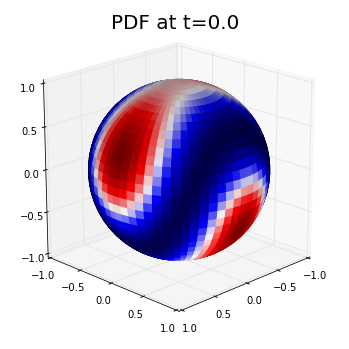

In [122]:
#Plot the pdf of the initial linear combination on the surface of a sphere as a color map: 
fig = plt.figure()
fig.set_size_inches(6, 6)
ax = fig.add_subplot(111,projection='3d')
plot_on_sphere(np.abs(Psi)**2.0, theta_mg, phi_mg, ax)
plt.savefig('sph_harm_plots/test000.png')
ttl=plt.title('PDF at t=0.0',fontsize=20)

Now we'll time evolve this linear combination of spherical harmonics. 

In [123]:
from matplotlib import animation

#Time evolve an plot at each time step. 
#Create a time array that goes from t=0 to t=3 in steps of 0.1
t_array = np.arange(0,2,.1)

#Write a for loop that loops over each value of the time array. 
for i in range(len(t_array)):
    #Get the i-th time value. 
    t = t_array[i]
    print 'time is ', t
    
    ###################
    #USE THE cn_t_function IN qworld TO GET THE VALUE OF THE cn COEFFICIENT AT TIME t 
    #assign to variables c1_t and c2_t (2 LINES)
    c1_t = qworld.cn_t_function(c1_0, t, E1)
    c2_t = qworld.cn_t_function(c2_0, t, E2)
    ###################
    
    ##################
    #ASSIGN TO VARIABLE  psi_t THE UPDATED LINEAR COMBINATION OF THE TWO EIGENFUNCTIONS
    Psi = c1_t*Y_lm_1 + c2_t*Y_lm_2
    ##################
    
    fig = plt.figure()
    fig.set_size_inches(6, 6)
    ax = fig.add_subplot(111,projection='3d')
    surf=plot_on_sphere(np.abs(Psi)**2.0, theta_mg, phi_mg, ax)
    ttl=plt.title('PDF at t='+str(t),fontsize=20)
    str_num = '%03d' % i
    plt.savefig('sph_harm_plots/test'+str_num+'.png')
    plt.close(fig)

time is  0.0
time is  0.1
time is  0.2
time is  0.3
time is  0.4
time is  0.5
time is  0.6
time is  0.7
time is  0.8
time is  0.9
time is  1.0
time is  1.1
time is  1.2
time is  1.3
time is  1.4
time is  1.5
time is  1.6
time is  1.7
time is  1.8
time is  1.9
time is  2.0
time is  2.1
time is  2.2
time is  2.3
time is  2.4
time is  2.5
time is  2.6
time is  2.7
time is  2.8
time is  2.9


The following two lines build and display the animation for the propagation.

In [124]:
!ffmpeg -framerate 1 -pattern_type glob -i 'sph_harm_plots/*.png' -c:v libx264 -pix_fmt yuv420p sph_harm_plots/out.mp4

ffmpeg version 2.5.8-0ubuntu0.15.04.1 Copyright (c) 2000-2015 the FFmpeg developers
  built with gcc 4.9.2 (Ubuntu 4.9.2-10ubuntu13)
  configuration: --prefix=/usr --extra-version=0ubuntu0.15.04.1 --build-suffix=-ffmpeg --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --shlibdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --enable-shared --disable-stripping --enable-avresample --enable-avisynth --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmodplug --enable-libmp3lame --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-libschroedinger --enable-libshine --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libwavpack --enable-libwebp --enable-libxvid --enable-opengl --enable-x11grab --enable-libdc1394 --enable

In [126]:
!mplayer sph_harm_plots/out.mp4

MPlayer2 2.0-728-g2c378c7-4 (C) 2000-2012 MPlayer Team
Cannot open file '/home/student/.mplayer/input.conf': No such file or directory
Failed to open /home/student/.mplayer/input.conf.
Cannot open file '/etc/mplayer/input.conf': No such file or directory
Failed to open /etc/mplayer/input.conf.

Playing sph_harm_plots/out.mp4.
Detected file format: QuickTime / MOV (libavformat)
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x7f70366cbb40]max_analyze_duration 5000000 reached
[lavf] stream 0: video (h264), -vid 0
Clip info:
 major_brand: isom
 minor_version: 512
 compatible_brands: isomiso2avc1mp41
 encoder: Lavf56.15.102
Load subtitles in sph_harm_plots/
Failed to open VDPAU backend libvdpau_nvidia.so: cannot open shared object file: No such file or directory
[vdpau] Error when calling vdp_device_create_x11: 1
[VO_XV] It seems there is no Xvideo support for your video card available.
[VO_XV] Run 'xvinfo' to verify its Xv support and read
[VO_XV] DOCS/HTML/en/video.html#xv!
[VO_XV] See 'mplayer -vo help' fo

## <i class="fa fa-wrench"></i> Step 3. Now rerun the code for generating the animation, but change the two spherical harmonics. (i.e. different values of $l$ and $m$.) Try the case where only the values of m differ.  What do you observe?

After you're done with this demo clean the folder where you saved the images for the movie executing the following box:

In [127]:
!rm -rf sph_harm_plots/